In [ ]:
import os
import copy
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Loading the Dataset


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arezaei81/heartcsv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heartcsv


In [ ]:
df = pd.read_csv("/content/heart.csv")

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Splitting the Data 70-30 Split

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (212, 13)
Testing features shape: (91, 13)
Training target shape: (212,)
Testing target shape: (91,)


# Modelling (Support Vector Machine)

In [ ]:
# Define SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")

    if kernel == 'poly':
        model = SVC(kernel=kernel, random_state=42, degree=3)
    else:
        model = SVC(kernel=kernel, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Save a deep copy of the trained model along with results
    results[kernel] = {
        'model': copy.deepcopy(model),
        'accuracy': accuracy,
        'report': report
    }

    print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")
    print(f"Classification Report with {kernel} kernel:\n{report}")
    print("-" * 30)

Training SVM with linear kernel...
Accuracy with linear kernel: 0.8132
Classification Report with linear kernel:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

------------------------------
Training SVM with poly kernel...
Accuracy with poly kernel: 0.7033
Classification Report with poly kernel:
              precision    recall  f1-score   support

           0       0.75      0.51      0.61        41
           1       0.68      0.86      0.76        50

    accuracy                           0.70        91
   macro avg       0.72      0.69      0.68        91
weighted avg       0.71      0.70      0.69        91

------------------------------
Training SVM with rbf kernel...
Accuracy with rbf kernel: 0.7033

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Comparison of Performances


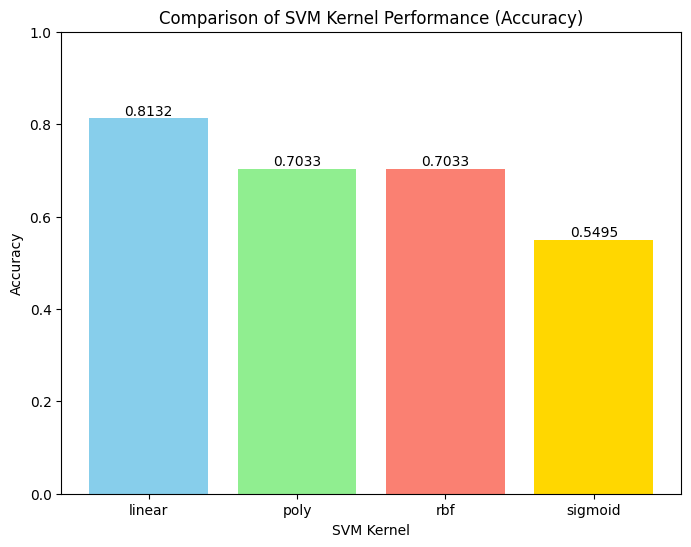

In [ ]:
# Extract kernel names and accuracies from the results dictionary
kernel_names = list(results.keys())
accuracies = [results[kernel]['accuracy'] for kernel in kernel_names]

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(kernel_names, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.xlabel("SVM Kernel")
plt.ylabel("Accuracy")
plt.title("Comparison of SVM Kernel Performance (Accuracy)")
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy

# Add the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center') # Add text labels

plt.show()

# Stacking with Support Vector Machine (Logistic Regression, Decision Tree, Gaussian Naive Bayes)

In [ ]:
# Base models (already defined earlier)
estimators = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('nb', GaussianNB())
]

stacking_results = {}

for kernel in results:
    meta_model = results[kernel]['model']
    print(f"\nTraining Stacking Classifier with SVM ({kernel}) as meta-classifier...")

    # Create stacking classifier
    stacking_clf = StackingClassifier(estimators=estimators,
                                      final_estimator=meta_model, cv=5)

    # Train
    stacking_clf.fit(X_train, y_train)

    # Predict
    y_pred_stacked = stacking_clf.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred_stacked)
    report = classification_report(y_test, y_pred_stacked)

    # Save results
    stacking_results[kernel] = {
        'model': stacking_clf,
        'accuracy': accuracy,
        'report': report
    }

    print(f"Accuracy with SVM ({kernel}) as meta-classifier: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")


Training Stacking Classifier with SVM (linear) as meta-classifier...
Accuracy with SVM (linear) as meta-classifier: 0.8462
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91


Training Stacking Classifier with SVM (poly) as meta-classifier...
Accuracy with SVM (poly) as meta-classifier: 0.8242
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.89      0.78      0.83        50

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91


Training Stacking Classifier with SVM (rbf) as meta-cla

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import numpy as np

# Base models (already defined earlier)
estimators = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('nb', GaussianNB())
]

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Prepare to store fold metrics for each meta-model kernel
meta_metrics_per_kernel = {
    kernel: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    for kernel in results
}

for kernel in results:
    meta_model = results[kernel]['model']
    print(f"\nEvaluating Stacking Classifier with SVM ({kernel}) as meta-classifier...")

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
        X_train_kf, X_test_kf = X.iloc[train_idx], X.iloc[test_idx]
        y_train_kf, y_test_kf = y.iloc[train_idx], y.iloc[test_idx]

        stacking_clf = StackingClassifier(estimators=estimators,
                                          final_estimator=meta_model,
                                          cv=5)
        stacking_clf.fit(X_train_kf, y_train_kf)
        y_pred_stack = stacking_clf.predict(X_test_kf)

        meta_metrics_per_kernel[kernel]['accuracy'].append(accuracy_score(y_test_kf, y_pred_stack))
        meta_metrics_per_kernel[kernel]['precision'].append(precision_score(y_test_kf, y_pred_stack, average='macro', zero_division=0))
        meta_metrics_per_kernel[kernel]['recall'].append(recall_score(y_test_kf, y_pred_stack, average='macro', zero_division=0))
        meta_metrics_per_kernel[kernel]['f1'].append(f1_score(y_test_kf, y_pred_stack, average='macro', zero_division=0))

        print(f"Fold {fold} - Acc: {meta_metrics_per_kernel[kernel]['accuracy'][-1]:.4f}, "
              f"Prec: {meta_metrics_per_kernel[kernel]['precision'][-1]:.4f}, "
              f"Rec: {meta_metrics_per_kernel[kernel]['recall'][-1]:.4f}, "
              f"F1: {meta_metrics_per_kernel[kernel]['f1'][-1]:.4f}")

# Print average results per kernel
print("\n=== Average Metrics for Stacking Classifiers (by Meta-model Kernel) ===")
for kernel, metrics_dict in meta_metrics_per_kernel.items():
    print(f"\nSVM Meta-model ({kernel.upper()} kernel):")
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        avg_val = np.mean(metrics_dict[metric])
        print(f"{metric.capitalize()}: {avg_val:.4f}")



Evaluating Stacking Classifier with SVM (linear) as meta-classifier...


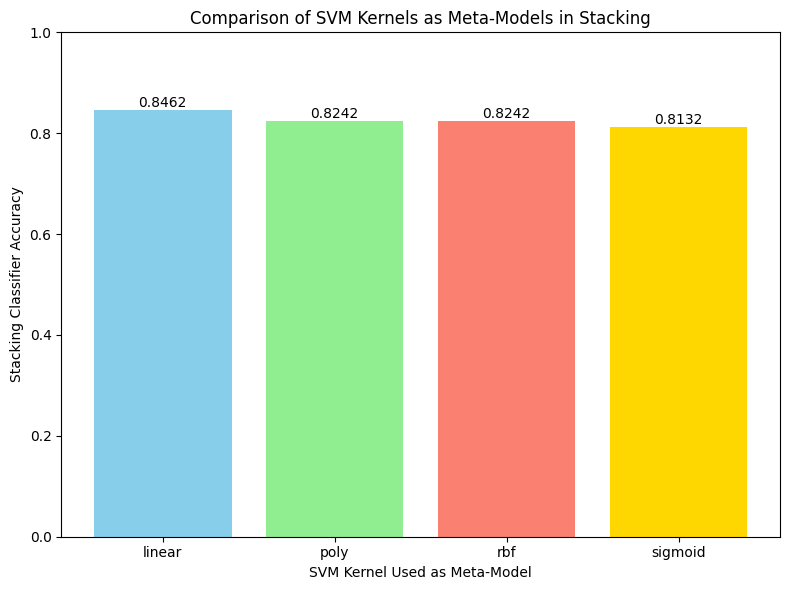

In [ ]:
# Prepare data
kernels = list(stacking_results.keys())
accuracies = [stacking_results[k]['accuracy'] for k in kernels]

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(kernels, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'gold'])

# Labels and title
plt.xlabel("SVM Kernel Used as Meta-Model")
plt.ylabel("Stacking Classifier Accuracy")
plt.title("Comparison of SVM Kernels as Meta-Models in Stacking")
plt.ylim(0, 1)  # Accuracy between 0 and 1

# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center')

plt.tight_layout()
plt.show()

# Comparison of Results (Acc, Recall, F1)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


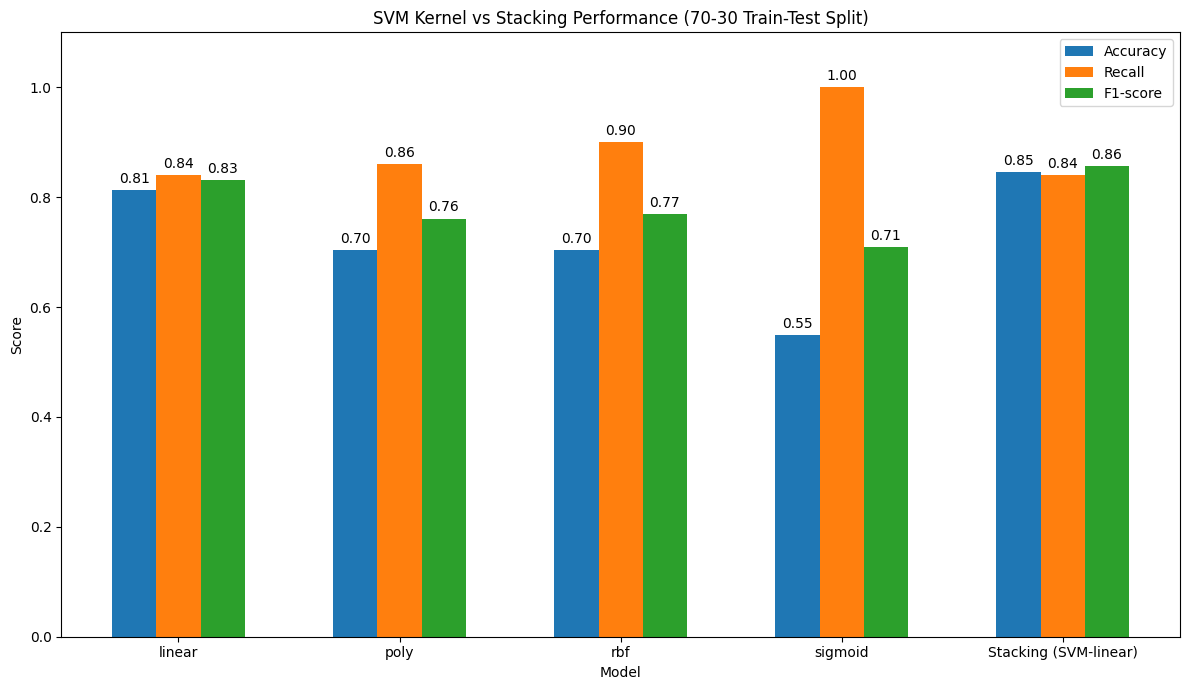

In [ ]:
# Prepare data
metrics = ['accuracy', 'recall', 'f1-score']
kernel_names = list(results.keys()) + ['Stacking (SVM-linear)']
metric_values = {metric: [] for metric in metrics}

# Loop over each base SVM model
for kernel in results:
    model = results[kernel]['model']
    y_pred = model.predict(X_test)
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    metric_values['accuracy'].append(results[kernel]['accuracy'])
    metric_values['recall'].append(report_dict['1']['recall'])
    metric_values['f1-score'].append(report_dict['1']['f1-score'])

# Add metrics for stacking model with SVM-linear as meta-model
stacked_model = stacking_results['linear']['model']
y_pred_stack = stacked_model.predict(X_test)
report_stack = classification_report(y_test, y_pred_stack, output_dict=True)

metric_values['accuracy'].append(stacking_results['linear']['accuracy'])
metric_values['recall'].append(report_stack['1']['recall'])
metric_values['f1-score'].append(report_stack['1']['f1-score'])

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.2
x = np.arange(len(kernel_names))

rects1 = ax.bar(x - bar_width, metric_values['accuracy'], bar_width, label='Accuracy')
rects2 = ax.bar(x, metric_values['recall'], bar_width, label='Recall')
rects3 = ax.bar(x + bar_width, metric_values['f1-score'], bar_width, label='F1-score')

ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("SVM Kernel vs Stacking Performance (70-30 Train-Test Split)")
ax.set_xticks(x)
ax.set_xticklabels(kernel_names)
ax.set_ylim(0, 1.1)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Splitting data into K-Fold 5 Splits

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Number of folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

kernels = list(results.keys())
metrics = ['accuracy', 'precision', 'recall', 'f1']
fold_metrics_per_kernel = {
    kernel: {metric: [] for metric in metrics} for kernel in kernels
}
fold_metrics_per_kernel['stacking'] = {metric: [] for metric in metrics}

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train_kf, X_test_kf = X.iloc[train_idx], X.iloc[test_idx]
    y_train_kf, y_test_kf = y.iloc[train_idx], y.iloc[test_idx]

    print(f"--- Fold {fold} ---")
    print(f"Train shape: {X_train_kf.shape}, Test shape: {X_test_kf.shape}")
    print(f"Train target shape: {y_train_kf.shape}, Test target shape: {y_test_kf.shape}")

    for kernel in kernels:
        model = results[kernel]['model']
        y_pred = model.predict(X_test_kf)

        fold_metrics_per_kernel[kernel]['accuracy'].append(accuracy_score(y_test_kf, y_pred))
        fold_metrics_per_kernel[kernel]['precision'].append(precision_score(y_test_kf, y_pred, average='macro', zero_division=0))
        fold_metrics_per_kernel[kernel]['recall'].append(recall_score(y_test_kf, y_pred, average='macro', zero_division=0))
        fold_metrics_per_kernel[kernel]['f1'].append(f1_score(y_test_kf, y_pred, average='macro', zero_division=0))

        print(f"{kernel} kernel - Acc: {fold_metrics_per_kernel[kernel]['accuracy'][-1]:.4f}, "
              f"Prec: {fold_metrics_per_kernel[kernel]['precision'][-1]:.4f}, "
              f"Rec: {fold_metrics_per_kernel[kernel]['recall'][-1]:.4f}, "
              f"F1: {fold_metrics_per_kernel[kernel]['f1'][-1]:.4f}")

    stacking_model = stacking_results['poly']['model']
    y_pred_stack = stacking_model.predict(X_test_kf)

    fold_metrics_per_kernel['stacking']['accuracy'].append(accuracy_score(y_test_kf, y_pred_stack))
    fold_metrics_per_kernel['stacking']['precision'].append(precision_score(y_test_kf, y_pred_stack, average='macro', zero_division=0))
    fold_metrics_per_kernel['stacking']['recall'].append(recall_score(y_test_kf, y_pred_stack, average='macro', zero_division=0))
    fold_metrics_per_kernel['stacking']['f1'].append(f1_score(y_test_kf, y_pred_stack, average='macro', zero_division=0))

    print(f"stacking - Acc: {fold_metrics_per_kernel['stacking']['accuracy'][-1]:.4f}, "
          f"Prec: {fold_metrics_per_kernel['stacking']['precision'][-1]:.4f}, "
          f"Rec: {fold_metrics_per_kernel['stacking']['recall'][-1]:.4f}, "
          f"F1: {fold_metrics_per_kernel['stacking']['f1'][-1]:.4f}")
    print("-" * 30)

# Print averaged metrics
print("\n=== Average Metrics Across Folds ===")
for model_name, metrics_dict in fold_metrics_per_kernel.items():
    print(f"\n{model_name.upper()}:")
    for metric in metrics:
        avg_val = np.mean(metrics_dict[metric])
        print(f"{metric.capitalize()}: {avg_val:.4f}")


--- Fold 1 ---
Train shape: (242, 13), Test shape: (61, 13)
Train target shape: (242,), Test target shape: (61,)
linear kernel - Acc: 0.8525, Prec: 0.8522, Rec: 0.8529, F1: 0.8523
poly kernel - Acc: 0.7049, Prec: 0.7185, Rec: 0.6977, F1: 0.6950
rbf kernel - Acc: 0.7049, Prec: 0.7413, Rec: 0.6945, F1: 0.6859
sigmoid kernel - Acc: 0.5246, Prec: 0.2623, Rec: 0.5000, F1: 0.3441
stacking - Acc: 0.8689, Prec: 0.8734, Rec: 0.8718, F1: 0.8688
------------------------------
--- Fold 2 ---
Train shape: (242, 13), Test shape: (61, 13)
Train target shape: (242,), Test target shape: (61,)
linear kernel - Acc: 0.7869, Prec: 0.7739, Rec: 0.7689, F1: 0.7711
poly kernel - Acc: 0.7049, Prec: 0.7003, Rec: 0.6430, F1: 0.6453
rbf kernel - Acc: 0.7377, Prec: 0.7492, Rec: 0.6779, F1: 0.6848
sigmoid kernel - Acc: 0.6230, Prec: 0.3115, Rec: 0.5000, F1: 0.3838
stacking - Acc: 0.8197, Prec: 0.8082, Rec: 0.8209, F1: 0.8124
------------------------------
--- Fold 3 ---
Train shape: (242, 13), Test shape: (61, 13)


In [ ]:
n_splits = len(next(iter(fold_accuracies_per_kernel.values())))
kernels = list(fold_accuracies_per_kernel.keys())
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid']

# Plot per fold with stacking included
for fold in range(n_splits):
    plt.figure(figsize=(8, 5))
    accuracies_fold = [fold_accuracies_per_kernel[kernel][fold] for kernel in kernels]
    bars = plt.bar(kernels, accuracies_fold, color=colors[:len(kernels)])

    plt.title(f"Accuracy Comparison per Model - Fold {fold + 1}")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.1)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot average accuracies including stacking
plt.figure(figsize=(8, 5))
avg_accuracies = [np.mean(fold_accuracies_per_kernel[k]) for k in kernels]
bars = plt.bar(kernels, avg_accuracies, color=colors[:len(kernels)])

plt.title("Average Accuracy Comparison per Model Across All Folds")
plt.xlabel("Model")
plt.ylabel("Average Accuracy")
plt.ylim(0, 1.1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'fold_accuracies_per_kernel' is not defined